# **Convolutional Neural Network - Computer Vision - SaiDa Face**

Here we're going to get specific and see how a special kind of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

> **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
* Classify whether a picture of faces contains Sana or Dahyun (we're going to do this)
* Detect whether or not an object appears in an image

## **What we're going to cover**

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model

## **Import Libraries**

In [1]:
# import libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import random
import pandas as pd

## **Inspect the data (become one with it)**

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Sana Dahyun Face](https://www.kaggle.com/knightbearr/sana-and-dahyun), a collection of 2 different categories of 300 (150 images per category 100 train data, and 50 test data) images of Dahyun and Sana face from Twice. 

To begin, we're going to use two of the categories, Sana and Dahyun face, and build a binary classifier.

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

With this being said, let's inspect the data.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

saida_face <- top level folder
└───test_data <- testing images
│   └───dahyun
│   │   │   dahyun (1).jpg
│   │   │   dahyun (2).jpg
│   │   │   ...      
│   └───sana
│       │   sana (1).jpg
│       │   sana (2).jpg
│       │   ...
│   
└───train_data <- training images
│   └───dahyun
│   │   │   dahyun (1).jpg
│   │   │   dahyun (2).jpg
│   │   │   ...      
│   └───sana
│       │   sana (1).jpg
│       │   sana (2).jpg
│       │   ...    
 ```

Let's inspect each of the directories.

In [2]:
# Walk through dahyun face directory and list number of files
for dirpath, dirnames, filenames in os.walk("../input/sana-and-dahyun/saida_face/"):
    print(f"There are {len(dirnames)} \
            directories and {len(filenames)} \
            images in {dirpath}")

There are 2             directories and 0             images in ../input/sana-and-dahyun/saida_face/
There are 2             directories and 0             images in ../input/sana-and-dahyun/saida_face/test_data
There are 0             directories and 50             images in ../input/sana-and-dahyun/saida_face/test_data/dahyun
There are 0             directories and 50             images in ../input/sana-and-dahyun/saida_face/test_data/sana
There are 2             directories and 0             images in ../input/sana-and-dahyun/saida_face/train_data
There are 0             directories and 100             images in ../input/sana-and-dahyun/saida_face/train_data/dahyun
There are 0             directories and 100             images in ../input/sana-and-dahyun/saida_face/train_data/sana


In [3]:
# Another way to find out how many images are in a file
num_dahyun_images_train = len(os.listdir("../input/sana-and-dahyun/saida_face/train_data/dahyun"))
num_dahyun_images_train

100

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path("../input/sana-and-dahyun/saida_face/train_data/") # Turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(f"class_names:\n{class_names}\n")

class_names:
['dahyun' 'sana']



Okay, so we've got a collection of 100 training images and 50 testing images of Dahyun and sana face.

Let's look at some.

> **Note:** Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. **Visualize, visualize, visualize.**

In [5]:
# Vies on image
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image1 = random.sample(os.listdir(target_folder), 1)
    random_image2 = random.sample(os.listdir(target_folder), 2)
    
    # Read in the image and plot it using matplotlib
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    img1 = mpimg.imread(target_folder + "/" + random_image1[0])
    plt.imshow(img1)
    plt.title(target_class)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    img2 = mpimg.imread(target_folder + "/" + random_image2[0])
    plt.imshow(img2)
    plt.title(target_class)
    plt.axis("off");
    
    # Show the shape of the image
    print(f"Image1 shape: {img1.shape}, Image2 shape: {img2.shape}")

Image1 shape: (1091, 728, 3), Image2 shape: (1124, 750, 3)


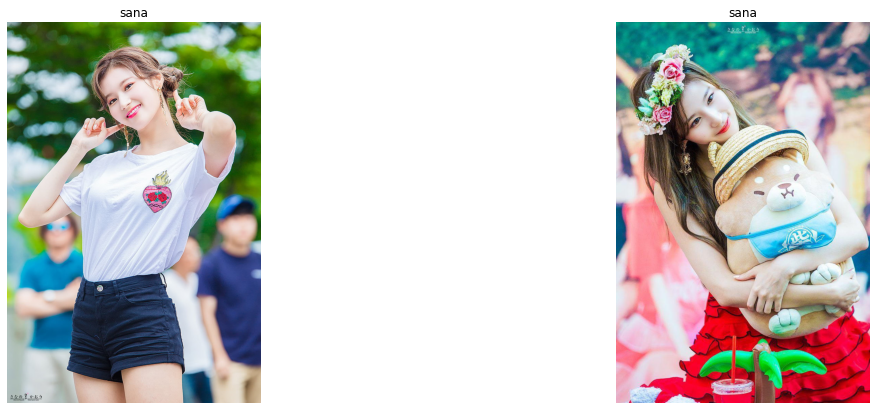

In [6]:
# View a random image from training dataset
img = view_random_image(target_dir="../input/sana-and-dahyun/saida_face/train_data/",
                        target_class="sana")

Image1 shape: (846, 564, 3), Image2 shape: (750, 750, 3)


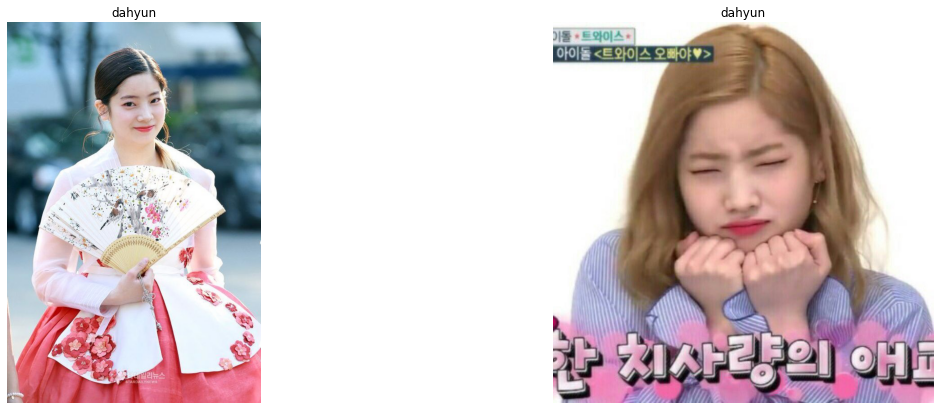

In [7]:
# View a random image from training dataset
img1 = view_random_image(target_dir="../input/sana-and-dahyun/saida_face/train_data/",
                        target_class="dahyun")

Image1 shape: (1080, 770, 3), Image2 shape: (474, 474, 3)


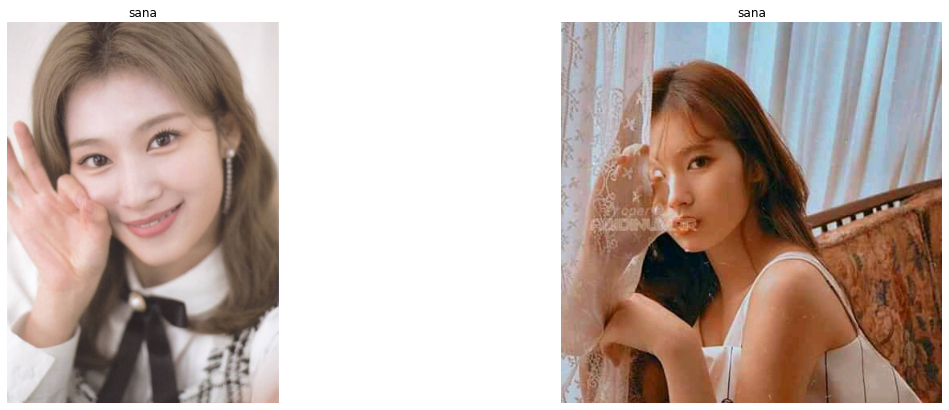

In [8]:
# View a random image from testing dataset
img3 = view_random_image(target_dir="../input/sana-and-dahyun/saida_face/test_data/",
                        target_class="sana")

Image1 shape: (1200, 800, 3), Image2 shape: (1533, 1200, 3)


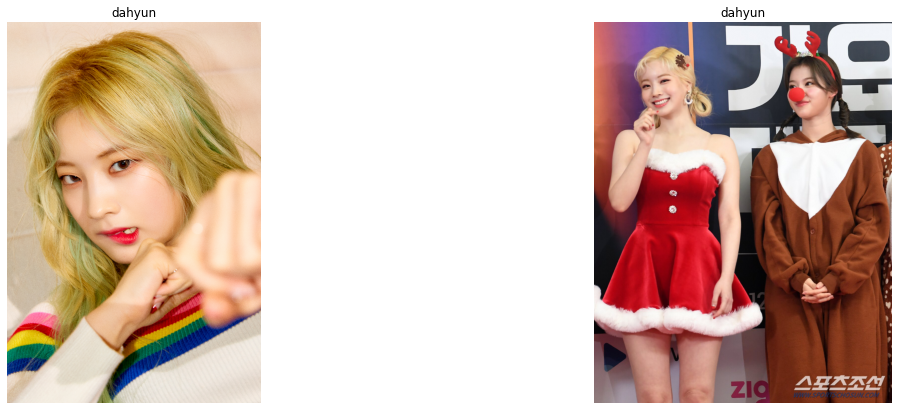

In [9]:
# View a random image from training dataset
img = view_random_image(target_dir="../input/sana-and-dahyun/saida_face/test_data/",
                        target_class="dahyun")

She beautiful isn't it? Please be my GF Sana!

Okay, go back to our business... 

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with. You might've noticed we've been printing the image shape alongside the plotted image. This is because the way our computer sees the image is in the form of a big array (tensor).

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels)`.

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of [red, green and blue (RGB) pixels](https://en.wikipedia.org/wiki/RGB_color_model).

You'll notice all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

## **A (typical) architecture of a convolutional neural network**

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

Okay, let's go to the code!

I'll start with a simple preprocessing data

In [10]:
# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test
train_dir = "../input/sana-and-dahyun/saida_face/train_data/"
test_dir = "../input/sana-and-dahyun/saida_face/test_data"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32, # number of images to process at a time
    target_size=(224, 224), # convert all images to be 224 x 224
    class_mode="binary", # type of problem we're working on
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=(3, 3), # can also be (3, 3)
        activation="relu",
        input_shape=(224, 224, 3)
    ), # First layer specifies input shape
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2), # pool_size can also be (2, 2)
        padding="valid"
    ),
    tf.keras.layers.Conv2D(
        10, 3, activation="relu"
    ),
    tf.keras.layers.Conv2D(
        10, 3, activation='relu'
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        1, activation='sigmoid' # binary activation output
    )
])

# Compile the model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(
    train_data, epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Epoch 1/5
7/7 [==============================] - 10s 1s/step - loss: 0.6997 - accuracy: 0.5150 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 8s 1s/step - loss: 0.6882 - accuracy: 0.5450 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 8s 1s/step - loss: 0.6606 - accuracy: 0.5450 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 4/5
7/7 [==============================] - 8s 1s/step - loss: 0.6305 - accuracy: 0.5900 - val_loss: 0.6973 - val_accuracy: 0.6200
Epoch 5/5
7/7 [==============================] - 8s 1s/step - loss: 0.5780 - accuracy: 0.7000 - val_loss: 0.7131 - val_accuracy: 0.5600


Looks that our model is learning something...

Since, we've already fit the model, let's check out its architecture.

In [11]:
model_1.summary() # Check out the layer in our model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

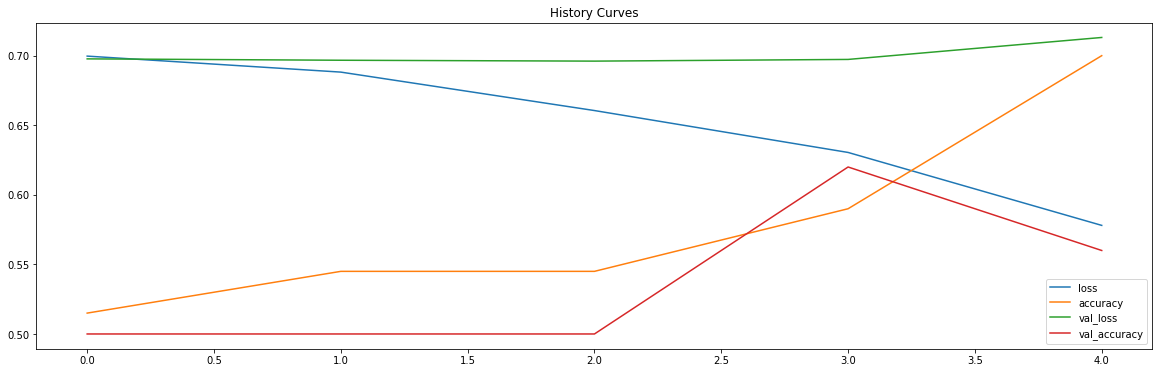

In [12]:
pd.DataFrame(history_1.history).plot(figsize=(20, 6), title="History Curves"); # Let's evaluate it

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for
    training and validation metrics.
    """
    # Loss and Val_loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Accuracy and Val_accuracy
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # set the epochs
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training_loss')
    plt.plot(epochs, val_loss, label='Val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training_accuracy')
    plt.plot(epochs, val_accuracy, label='Val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

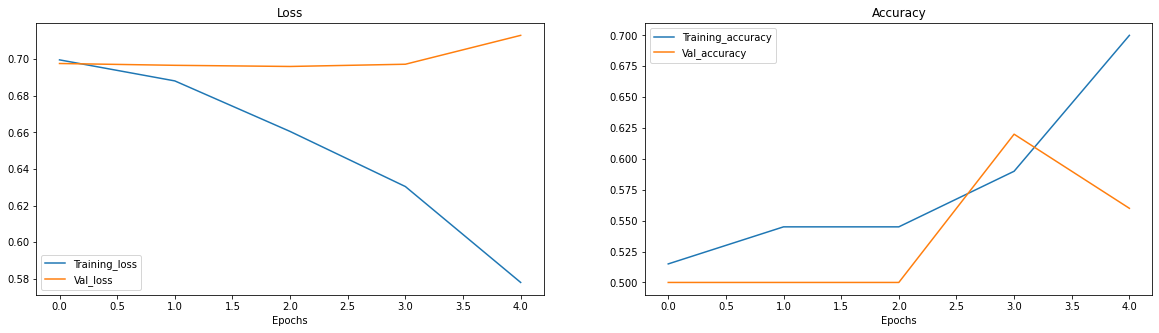

In [14]:
plot_loss_curves(history_1)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

Okay, let's improve our data...

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator instances.

In [15]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True) # flip the image on the horizontal axis
# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a Dahyun vs Sana application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [16]:
# Import data and augment it from trainng directory
tf.random.set_seed(42)

print("Augmented training images:")
train_data = train_datagen_augmented.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32,
    class_mode="binary", seed=42, shuffle=True
)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32,
    class_mode="binary", seed=42
)

Augmented training images:
Found 200 images belonging to 2 classes.
Unchanged test images:
Found 100 images belonging to 2 classes.


In [17]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
# Creta the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_2 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3) 
    ),
    Conv2D(
        10, 3, activation="relu"
    ),
    MaxPool2D(2),
    Conv2D(
        10, 3, activation="relu"
    ),
    Conv2D(
        10, 3, activation="relu"
    ),
    MaxPool2D(2),
    Flatten(),
    Dense(
        1, activation="sigmoid"
    )
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

Now our model is ready, let's compile it.

In [19]:
# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.031),
    metrics=["accuracy"]
)

Since we're working on a binary classification problem (Dahyun vs Sana), the `loss` function we're using is `'binary_crossentropy'`, if it was mult-iclass, we might use something like `'categorical_crossentropy'`.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

Fit the model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (200 images in batches of 32 = 200/32 = ~7 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (100 test images in batches of 32 = 100/32 = ~4 steps)

In [20]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(7, 4)

In [21]:
# Fit the model
history_2 = model_2.fit(
    train_data, epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
7/7 [==============================] - 11s 2s/step - loss: 4.6573 - accuracy: 0.5250 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 10s 1s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 10s 1s/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000


Okay, our model is not learning something...

Let's check its architecture...

In [22]:
model_2.summary() # check the layer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

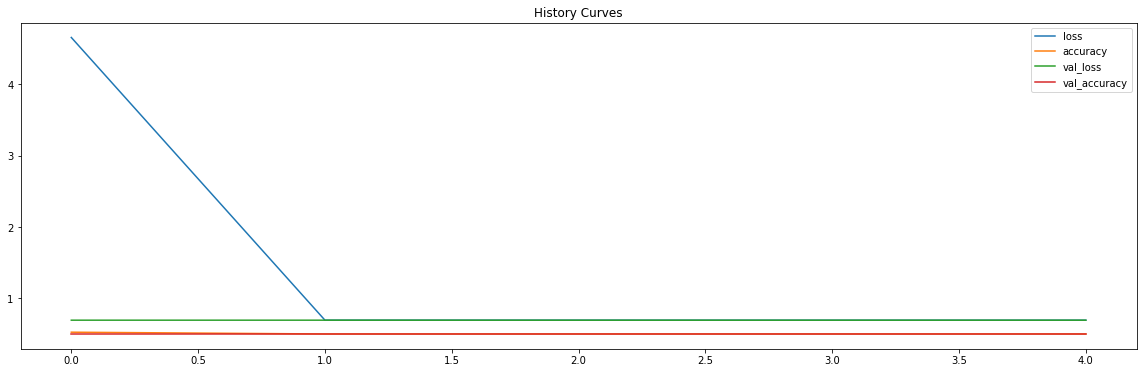

In [23]:
pd.DataFrame(history_2.history).plot(figsize=(20, 6), title="History Curves"); # Let's evaluate it

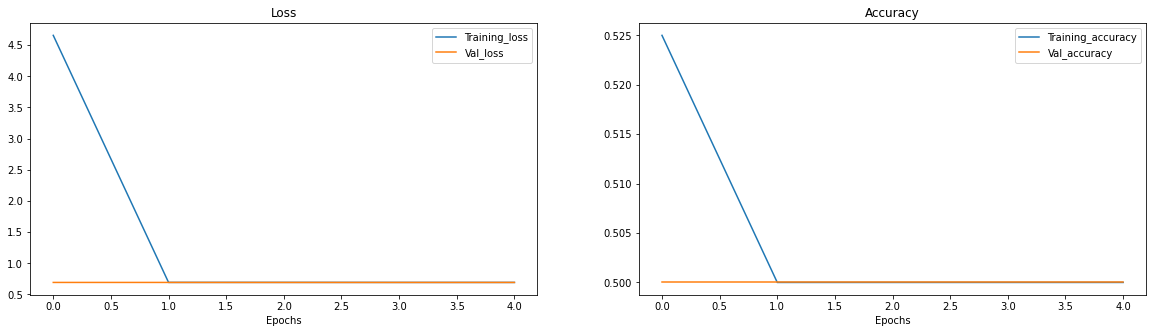

In [24]:
plot_loss_curves(history_2)

okay, let's repeat until we satisfied...

In [25]:
# Create a CNN model (sanme as Tiny VGG but for binary classification - )
model_3 = Sequential([
    Conv2D(10, 3, activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_3 = model_3.fit(
    train_data, epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
7/7 [==============================] - 11s 2s/step - loss: 0.7504 - accuracy: 0.5200 - val_loss: 0.7205 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 10s 1s/step - loss: 0.7084 - accuracy: 0.5150 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 10s 2s/step - loss: 0.6865 - accuracy: 0.5400 - val_loss: 0.6966 - val_accuracy: 0.5300
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.6842 - accuracy: 0.5700 - val_loss: 0.6927 - val_accuracy: 0.6100
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.6768 - accuracy: 0.5750 - val_loss: 0.7051 - val_accuracy: 0.5100


Hmm... look like our model learning something...

Let's check its architecture...

In [26]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            

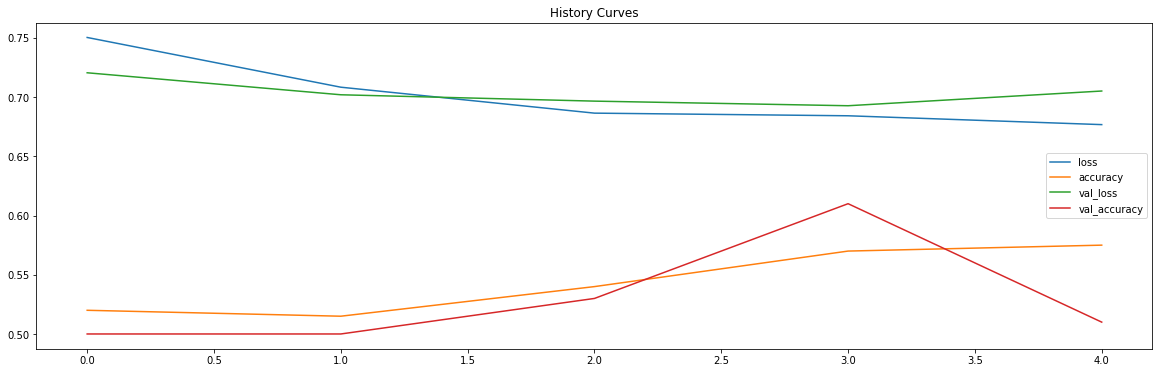

In [27]:
pd.DataFrame(history_3.history).plot(figsize=(20, 6), title="History Curves"); # Let's evaluate it

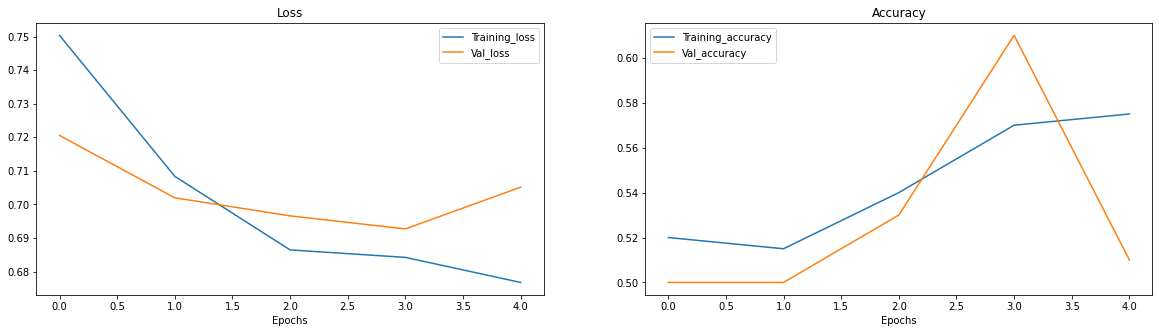

In [28]:
plot_loss_curves(history_3)

The plot is look good...

Let's use the first model, now using `Data Augmentation`...

In [29]:
# Set the randon seed
tf.random.set_seed(42)

history_4 = model_1.fit(
    train_data, epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
7/7 [==============================] - 11s 2s/step - loss: 0.6504 - accuracy: 0.6200 - val_loss: 0.7235 - val_accuracy: 0.6100
Epoch 2/5
7/7 [==============================] - 10s 1s/step - loss: 0.6228 - accuracy: 0.6450 - val_loss: 0.7887 - val_accuracy: 0.4500
Epoch 3/5
7/7 [==============================] - 10s 2s/step - loss: 0.6334 - accuracy: 0.6100 - val_loss: 0.7699 - val_accuracy: 0.5600
Epoch 4/5
7/7 [==============================] - 10s 2s/step - loss: 0.5884 - accuracy: 0.6650 - val_loss: 0.8727 - val_accuracy: 0.6300
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.6550 - accuracy: 0.6350 - val_loss: 0.8000 - val_accuracy: 0.5300


In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

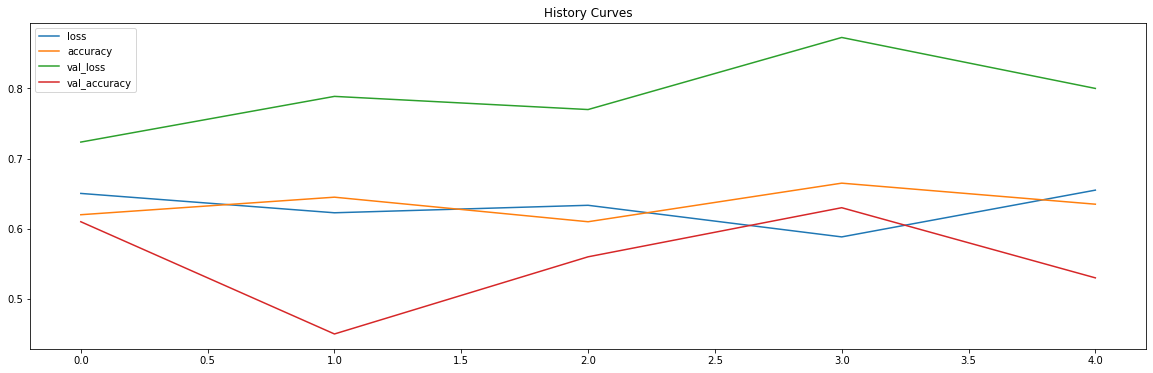

In [31]:
pd.DataFrame(history_4.history).plot(figsize=(20, 6), title="History Curves");

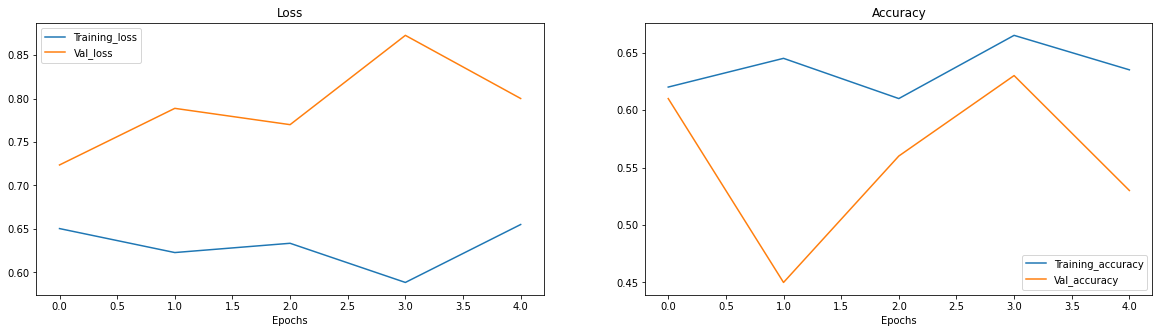

In [32]:
plot_loss_curves(history_4)

> ***After modeling again and again, it look like the model is mostly overfitting, this is because the data that we have is so small, it's just have 200 in training data, and 100 in testing data, I'll improve the data ASAP, wait for it....***

# **Thank you for reading...**

## **Upvote if you like it! and don't forget to give me a feedback and comment! Have a great day!**

### **Inspiration**

* https://github.com/mrdbourke/tensorflow-deep-learning